# Projekt #1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode

In [3]:
def anal_sol(T, N, w_0, w, y):
    t = np.linspace(0,T, N+1)
    if w_0 == w:
        d_1 = 0
        
        theta_2 = d_1*np.cos(w_0*t) + ((y*w_0)/2)*t*np.sin(w_0*t)
        return theta_2, t
    else:
        c_1 = -((y*w_0**2)/(w_0**2-w**2))
        c_2 = 0
    
        theta_1 = c_1*np.cos(w_0*t) + c_2*np.sin(w_0*t) + (y*w_0**2*np.cos(w*t))/(w_0**2-w**2)

        return theta_1, t
    
def func2(t, u, w, w_0, B, y):
	a, b = u
	da_dt = b
	db_dt = -w_0**2 * np.sin(a) - 2*B*b + y*w_0**2*np.cos(w*t)
	return np.array([da_dt, db_dt])

def func3(t, u, w_0, w, y):
	a, b = u
	da_dt = b
	db_dt = -w_0**2 * a + y * w_0**2 * np.cos(w*t)
	return np.array([da_dt, db_dt])

def RK4(func, initvalues, T, N, w, w_0, y):
	k = T/N
	t = np.linspace(0,T,N+1)
	u = np.zeros((N+1,2),dtype = float)
	u[0,:] = initvalues

	for n in range(N):
		w1=func(t[n], u[n,:], w_0, w, y)
		w2=func(t[n] + k/2, u[n,:] + k/2 * w1, w_0, w, y)
		w3=func(t[n] + k/2, u[n,:] + k/2 * w2, w_0, w, y)
		w4=func(t[n+1], u[n,:] + k * w3, w_0, w, y)
		u[n+1,:] = u[n,:] + k/6*(w1 + 2*w2 + 2*w3 + w4)
	
	return u, t

def RK1(func, initvalues, T, N, w, w_0, y):
	k = T/N
	t = np.linspace(0,T,N+1)
	u = np.zeros((N+1,2),dtype = float)
	u[0,:] = initvalues

	for n in range(N):
		u[n+1] = u[n] + k*func(t[n],u[n], w_0, w, y)

	return u, t


## Deluppgfit #1

Implementera de analytiska lösningarna

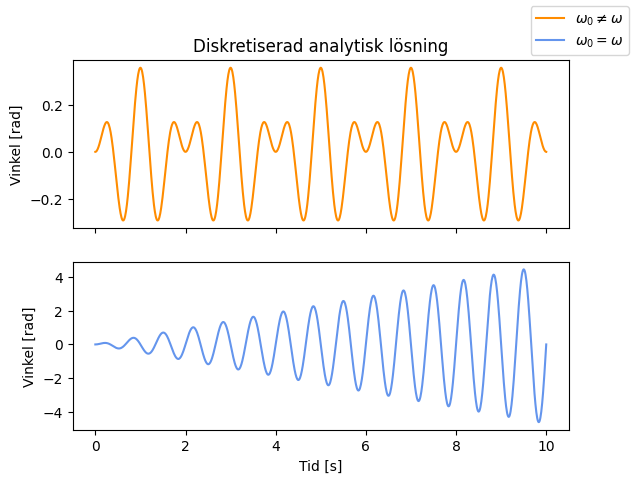

In [4]:
w1 = 2*np.pi
w_01 = 3*np.pi
y1 = 0.1
theta1, t1 = anal_sol(10, 1000, w_01, w1, y1)

w2 = 3*np.pi
w_02 = 3*np.pi
y2 = 0.1
theta2, t2 = anal_sol(10, 1000, w_02, w2, y2)

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(t1, theta1, color='darkorange', label='$\omega_0 \\neq \omega$')
ax2.plot(t2, theta2, color='cornflowerblue', label='$\omega_0 = \omega$')
ax2.set_xlabel('Tid [s]')
ax1.set_ylabel('Vinkel [rad]')
ax2.set_ylabel('Vinkel [rad]')
ax1.set_title('Diskretiserad analytisk lösning')
fig.legend()

## Deluppgift 2

Implementera RK4

[ 0.04625807 -0.72153538]


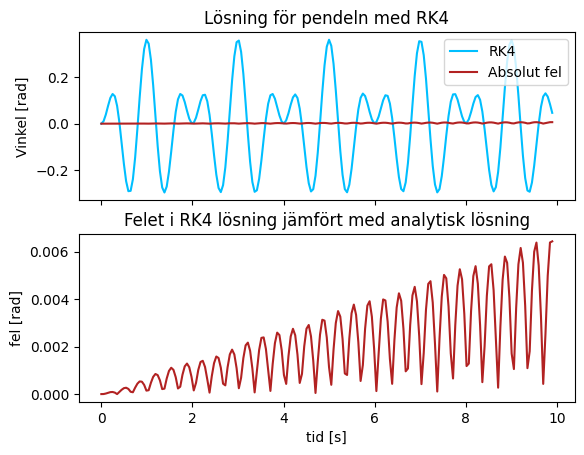

In [13]:
f = np.array([0,0]) #begynelsevärden

T=9.9
N=200

w = 2*np.pi
w_0 = 3*np.pi
y = 0.1

anal_theta, t1 = anal_sol(T, N, w_0, w, y)
u, t2 = RK4(func3, f, T, N, w, w_0, y)

err = np.abs(anal_theta - u[:, 0])

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(t2, u[:, 0], label='RK4', color='deepskyblue')
ax1.plot(t1, err, label='Absolut fel', color='firebrick')
ax2.plot(t1, err, label='Absolut fel', color='firebrick')
ax1.set_title('Lösning för pendeln med RK4')
ax2.set_title('Felet i RK4 lösning jämfört med analytisk lösning')
ax2.set_xlabel('tid [s]')
ax1.set_ylabel('Vinkel [rad]')
ax2.set_ylabel('fel [rad]')
ax1.legend()

print(u[-1])

Beräkna e och q

In [6]:
f = np.array([0,0])
w = 2*np.pi
w_0 = 3*np.pi
y = 0.1
T = 9.9

steps = [200, 400, 800]
eN = {}
qN = {}

for step in steps:
    anal_theta, t1 = anal_sol(T, step, w_0, w, y)
    u, t2 = RK4(func3, f, T, step, w, w_0, y)

    err = np.abs(anal_theta - u[:, 0])

    eN[step] = err[step]


for step in steps:
    try:
        qN[int(step*2)] = np.log2(eN[step]/eN[int(step*2)])
    except:
        continue
    
print(eN, qN)

{200: 0.006436352300071696, 400: 0.0003773134743835782, 800: 2.241094443557884e-05} {400: 4.092407768747675, 800: 4.0734882688121195}


## Deluppgift 3
Numerisk stabilitet

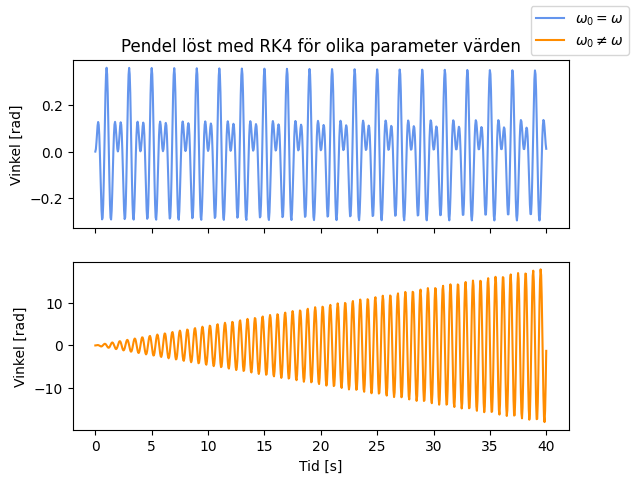

In [7]:
f = np.array([0,0]) #begynelsevärden

T=40
N=800

w = 3*np.pi
w_0 = 3*np.pi
y = 0.1
u1, t1 = RK4(func3, f, T, N, w, w_0, y)

w = 2*np.pi
w_0 = 3*np.pi
y = 0.1
u2, t2 = RK4(func3, f, T, N, w, w_0, y)

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax2.plot(t1, u1[:, 0], color='darkorange', label='$\omega_0 \\neq \omega$')
ax1.plot(t2, u2[:, 0], color='cornflowerblue', label='$\omega_0 = \omega$')
ax2.set_xlabel('Tid [s]')
ax1.set_ylabel('Vinkel [rad]')
ax2.set_ylabel('Vinkel [rad]')
ax1.set_title('Pendel löst med RK4 för olika parameter värden')
fig.legend()

Text(0.5, 0, 'tid[s]')

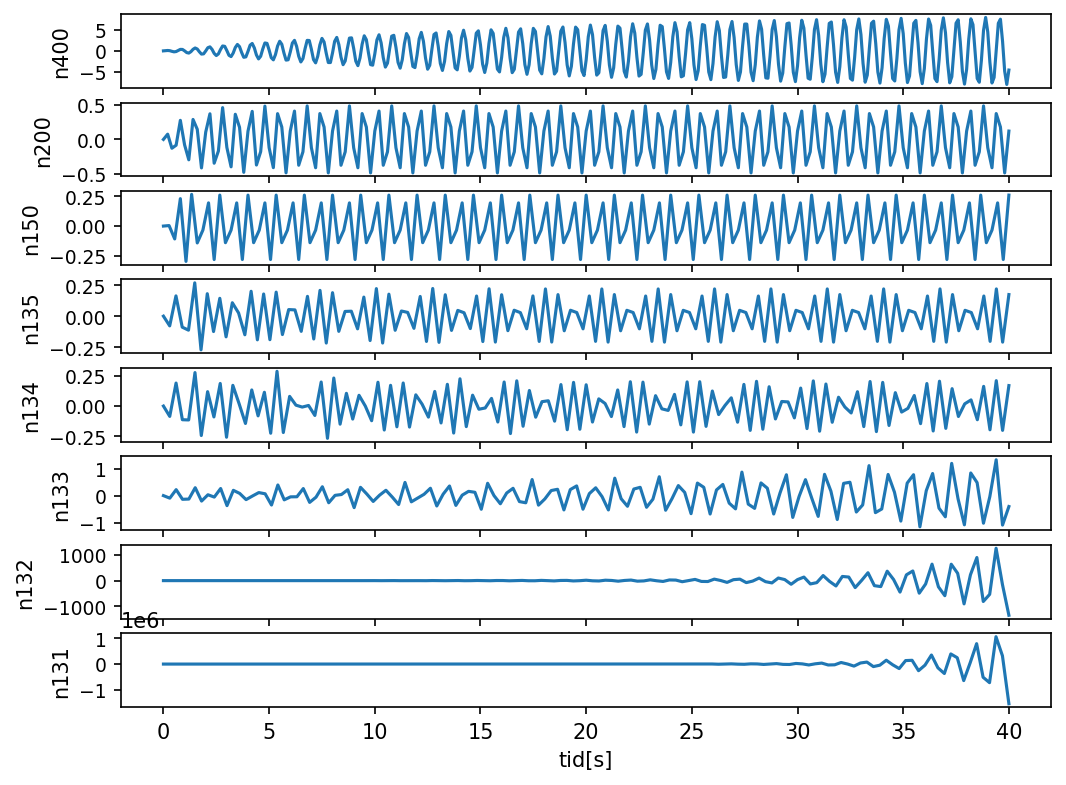

In [15]:
step_counts = [400, 200, 150, 135, 134, 133, 132, 131]
axes = ['n400', 'n200', 'n150', 'n135', 'n134', 'n133', 'n132', 'n131']
titels = ['n400', 'n200', 'n150', 'n135', 'n134', 'n133', 'n132', 'n131']

T=40

w = 3*np.pi
w_0 = 3*np.pi
y = 0.1

fig, axes = plt.subplots(8,1, sharex=True)
fig.set_figheight(6)
fig.set_figwidth(8)
fig.set_dpi(150)
for step_count, axis, titel in zip(step_counts, axes, titels):
    u1, t1 = RK4(func3, f, T, step_count, w, w_0, y)
    axis.plot(t1, u1[:, 0])
    axis.tick_params(axis='y', labelsize=9)
    axis.set_ylabel(titel)
axes[-1].set_xlabel('tid[s]')

Text(0.5, 1.0, 'Pendel löst med RK1')

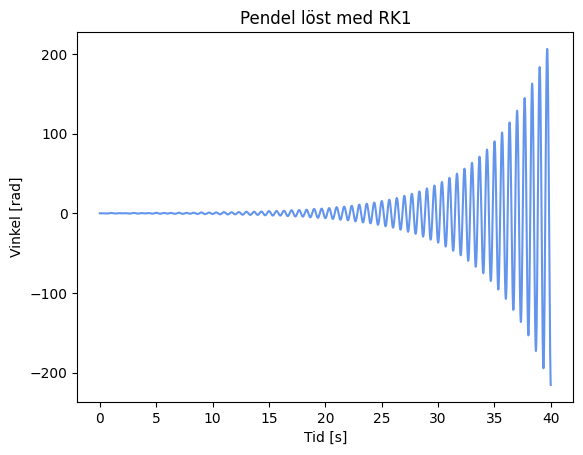

In [9]:
N = 10000
w = 2*np.pi
w_0 = 3*np.pi
y = 0.1
u2, t2 = RK1(func3, f, T, N, w, w_0, y)

fig, ax1 = plt.subplots()
ax1.plot(t2, u2[:, 0], color='cornflowerblue', label='$\omega_0 \\neq \omega$')
ax1.set_xlabel('Tid [s]')
ax1.set_ylabel('Vinkel [rad]')
ax1.set_title('Pendel löst med RK1')

## Deluppgift 4
Kaos

Text(0.5, 1.0, 'ODE för pendel löst med RK45')

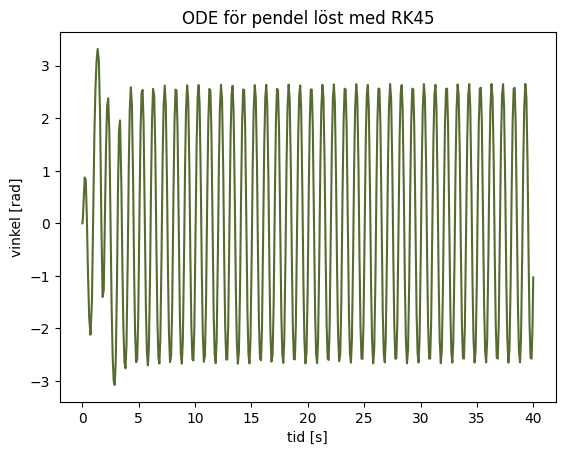

In [10]:
T = 40

f = np.array([0,0])
tspan = (0,T)

w = 2*np.pi
w_0 = (3/2)*w
B = (1/4)*w_0
y = 1

SOL = ode.solve_ivp(func2, tspan, f, method='RK45', args=(w, w_0, B, y))

fig, ax = plt.subplots()
ax.plot(SOL.t, SOL.y[0], label='Numerisk lösning med RK45', color='darkolivegreen')
ax.set_xlabel('tid [s]')
ax.set_ylabel('vinkel [rad]')
ax.set_title('ODE för pendel löst med RK45')


Text(0.5, 0, 'tid [s]')

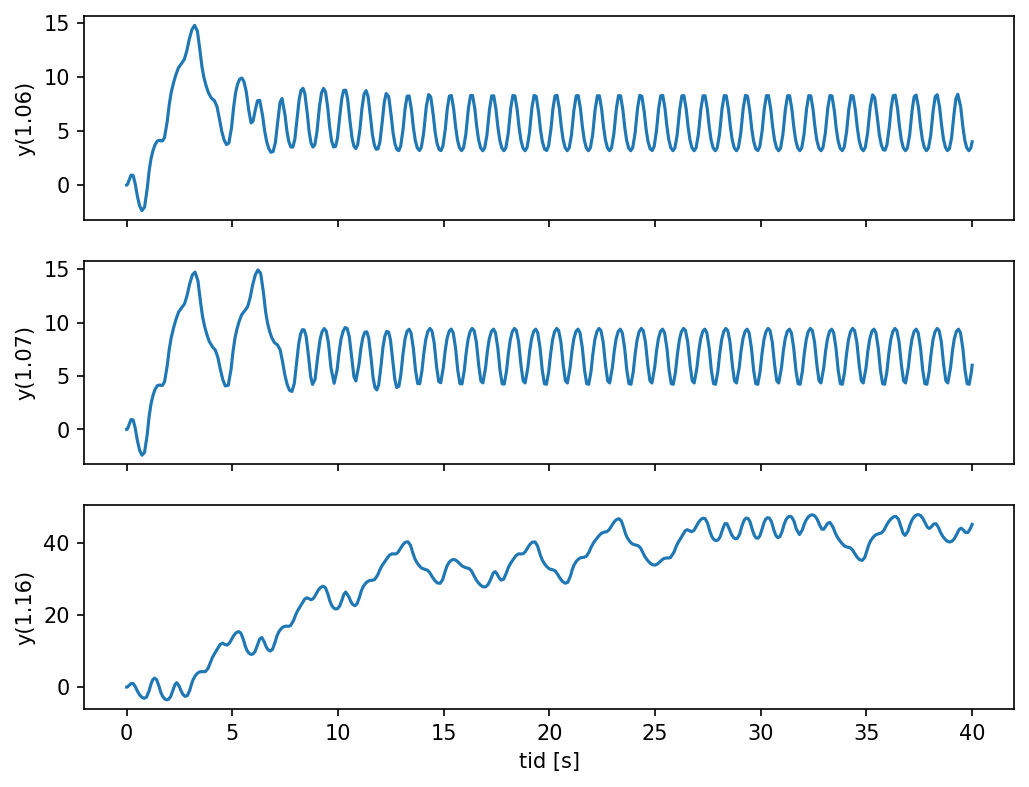

In [16]:
T = 40

f = np.array([0,0])
tspan = (0,T)

w = 2*np.pi
w_0 = (3/2)*w
B = (1/4)*w_0
y1 = [1.06, 1.07, 1.16]
axes = ['y(1.06)', 'y(1.07)','y(1.16)']
titles = ['y(1.06)', 'y(1.07)','y(1.16)']

fig, axes = plt.subplots(3,1, sharex=True)
fig.set_figheight(6)
fig.set_figwidth(8)
fig.set_dpi(150)
for value, axis, title in zip(y1, axes, titles):
    SOL = ode.solve_ivp(func2, tspan, f, method='RK45', args=(w, w_0, B, value))
    axis.plot(SOL.t, SOL.y[0])
    axis.set_ylabel(title)
axes[-1].set_xlabel('tid [s]')
    